## Make your forward method !

In [1]:
import torch
from torch.autograd import Variable

In [2]:
class MyTwolayernet(torch.nn.Module):
# when you made your activation function, you used torch.autograd.Function
    def __init__(self, input_size, hidden_size, output_size):
        """
        Initiate nn.Linear modules
        """
        super(MyTwolayernet, self).__init__()
        # use 'super()'  not to repeat parent class method 
        # super().__init__()
        self.linear1 = torch.nn.Linear(input_size, hidden_size)
        self.linear2 = torch.nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        """
        Get your Varible and return prediction
        """
        inh1 = self.linear1(x)
        outh1 = inh1.clamp(min=0)
        prediction = self.linear2(outh1)
        return prediction

In [3]:
batch_size, input_size, hidden_size, output_size = 64, 1000, 100, 10
learning_rate = 1e-4  # 1e-6 is too small here with nn

In [4]:
x = Variable(torch.randn(batch_size, input_size), requires_grad = False) # False is default
y = Variable(torch.randn(batch_size, output_size), requires_grad = False)

In [5]:
# model = torch.nn.Sequential(
#         torch.nn.Linear(input_size, hidden_size),
#         torch.nn.ReLU(),
#         torch.nn.Linear(hidden_size, output_size))
model  = MyTwolayernet(input_size, hidden_size, output_size)
loss_fn = torch.nn.MSELoss(reduction = 'sum')
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [8]:
print(model)

MyTwolayernet(
  (linear1): Linear(in_features=1000, out_features=100, bias=True)
  (linear2): Linear(in_features=100, out_features=10, bias=True)
)


In [6]:
all_losses = []

for i in range(500):
    # forward
    prediction = model(x)

    # loss
    loss = loss_fn(prediction, y)
    all_losses.append(loss)
#     print('i = %d, loss = %d' %(i, loss.data))
    
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [7]:
model.linear1.weight.grad
# model.linear1.bias.grad

tensor([[-2.4736e-05,  9.0476e-07, -6.3865e-05,  ..., -1.8346e-05,
          1.2227e-05, -1.9415e-05],
        [ 4.3512e-05, -2.1850e-05, -2.1325e-05,  ...,  1.4946e-05,
         -2.0349e-05, -1.7772e-05],
        [-6.3597e-05, -1.3913e-05,  7.7440e-06,  ..., -8.3997e-05,
         -5.0243e-05,  1.4060e-05],
        ...,
        [ 2.3154e-05,  2.8660e-05,  6.4778e-05,  ...,  7.1436e-05,
          2.5626e-05, -1.0843e-04],
        [-4.2391e-05,  4.1786e-05, -5.8335e-05,  ..., -3.0086e-05,
          5.0319e-05, -4.0704e-05],
        [ 4.0484e-05,  3.7557e-05, -1.3302e-05,  ..., -6.1968e-05,
          3.7389e-05,  6.0559e-06]])

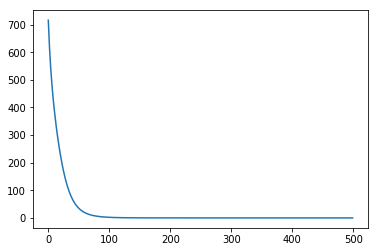

In [8]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.figure()
plt.plot(all_losses)